In [1]:
import os
import warnings
import pandas as pd
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

from strandtools.plot import plot_chromosome, plot
from strandtools.plot import plot_count_ratio, plot_count_ratio_plate 
from strandtools.plot import plot_clustermap, plot_cn_prediction, plot_cn_overview

In [2]:
PATH_TO_NORMALIZED_DATA = '../resources/BM510x3.txt.normalized.gz'
PATH_TO_CLASSIFIER = '../resources/BM510x3.cnc.supersegm.pkl'
cwd = os.getcwd()
PATH_TO_STRANDTOOLS = os.path.join(cwd, "../")

In [3]:
counts = pd.read_csv(PATH_TO_NORMALIZED_DATA, index_col=0)
counts.head()

chrom   start      end   sample            cell          w          c  \
0  chr1       0   200000  BM510x3  BM510x3PE20401  18.806191  12.537461   
1  chr1  200000   400000  BM510x3  BM510x3PE20401   0.000000   0.000000   
2  chr1  400000   600000  BM510x3  BM510x3PE20401   0.000000  26.133269   
3  chr1  600000   800000  BM510x3  BM510x3PE20401  21.920134   2.740017   
4  chr1  800000  1000000  BM510x3  BM510x3PE20401  25.261188   0.000000   

   tot_count class  
0  31.343652    WW  
1   0.000000    WW  
2  26.133269    WW  
3  24.660151    WW  
4  25.261188    WW

## Strand-seq plots

We covered in a previous tutorial how to plot strand-seq data

/Users/tweber/miniconda3/envs/strandtools-condaenv/lib/python3.11/site-packages/strandtools/plot.py:314: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


[<Figure size 2500x600 with 3 Axes>]

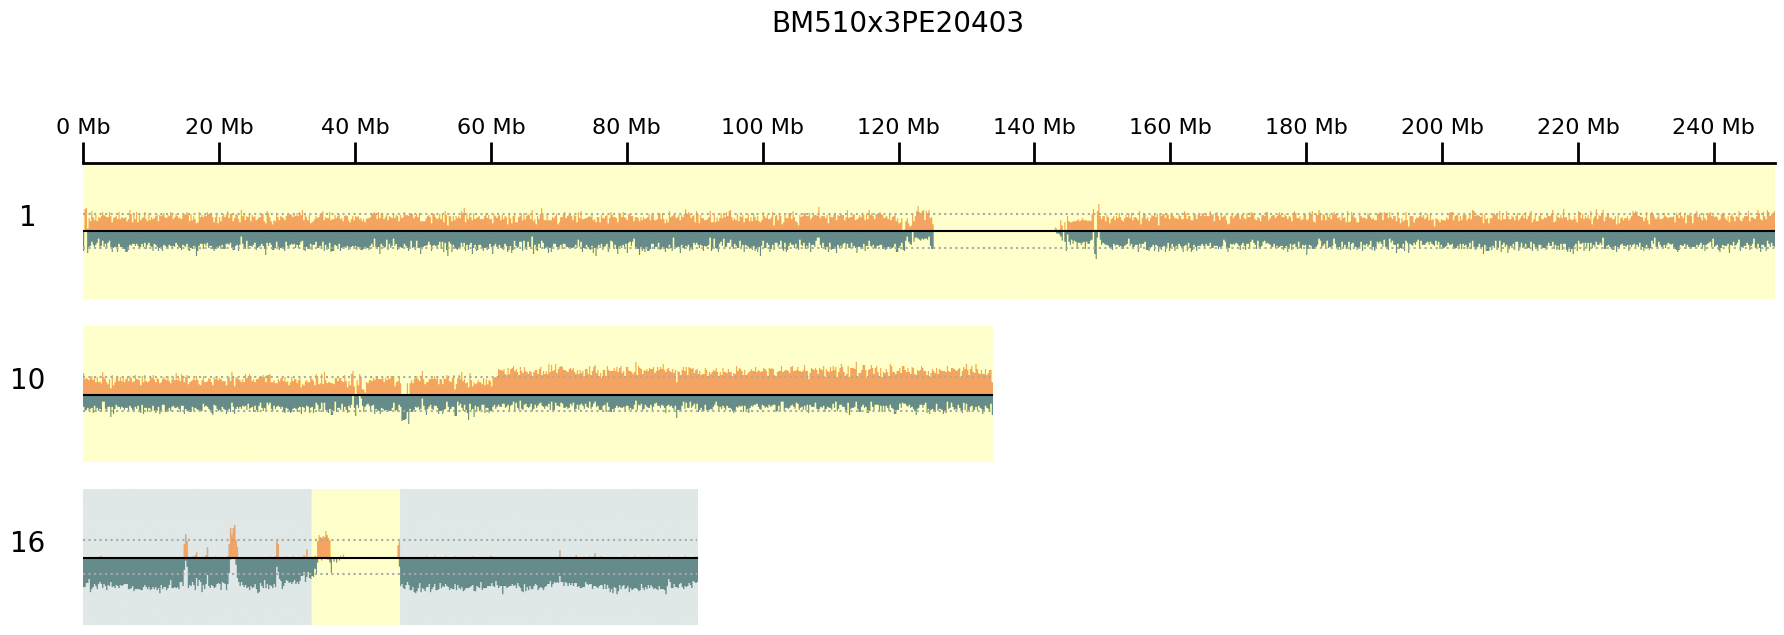

In [4]:
plot(counts[(counts['cell'] == 'BM510x3PE20403')&(counts['chrom'].isin(['chr1', 'chr10', 'chr16']))], groupby='cell', median = 'cell')

## count-ratio plots

An important diagnostic plot is the count-ratio plot, that displays total reads vs watson fraction in a bin window.  
The bin window is necessary to compensate the noise of Strand-seq data. Usually a window of 2 Mb works well.

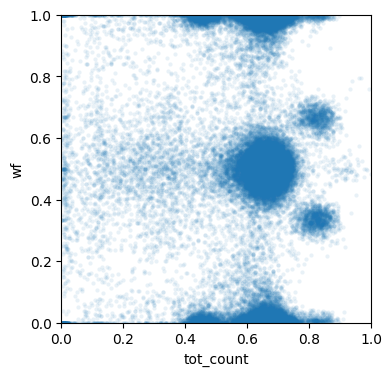

In [5]:
_ = plot_count_ratio(counts, bin_size=2e6)

From the count-ratio plots we can also detect cells that have too much noise or incorrect BrdU incorporation. Essentially every cell, where the clusters cannot be readily seen, will have some kind of problem and have to be excluded.

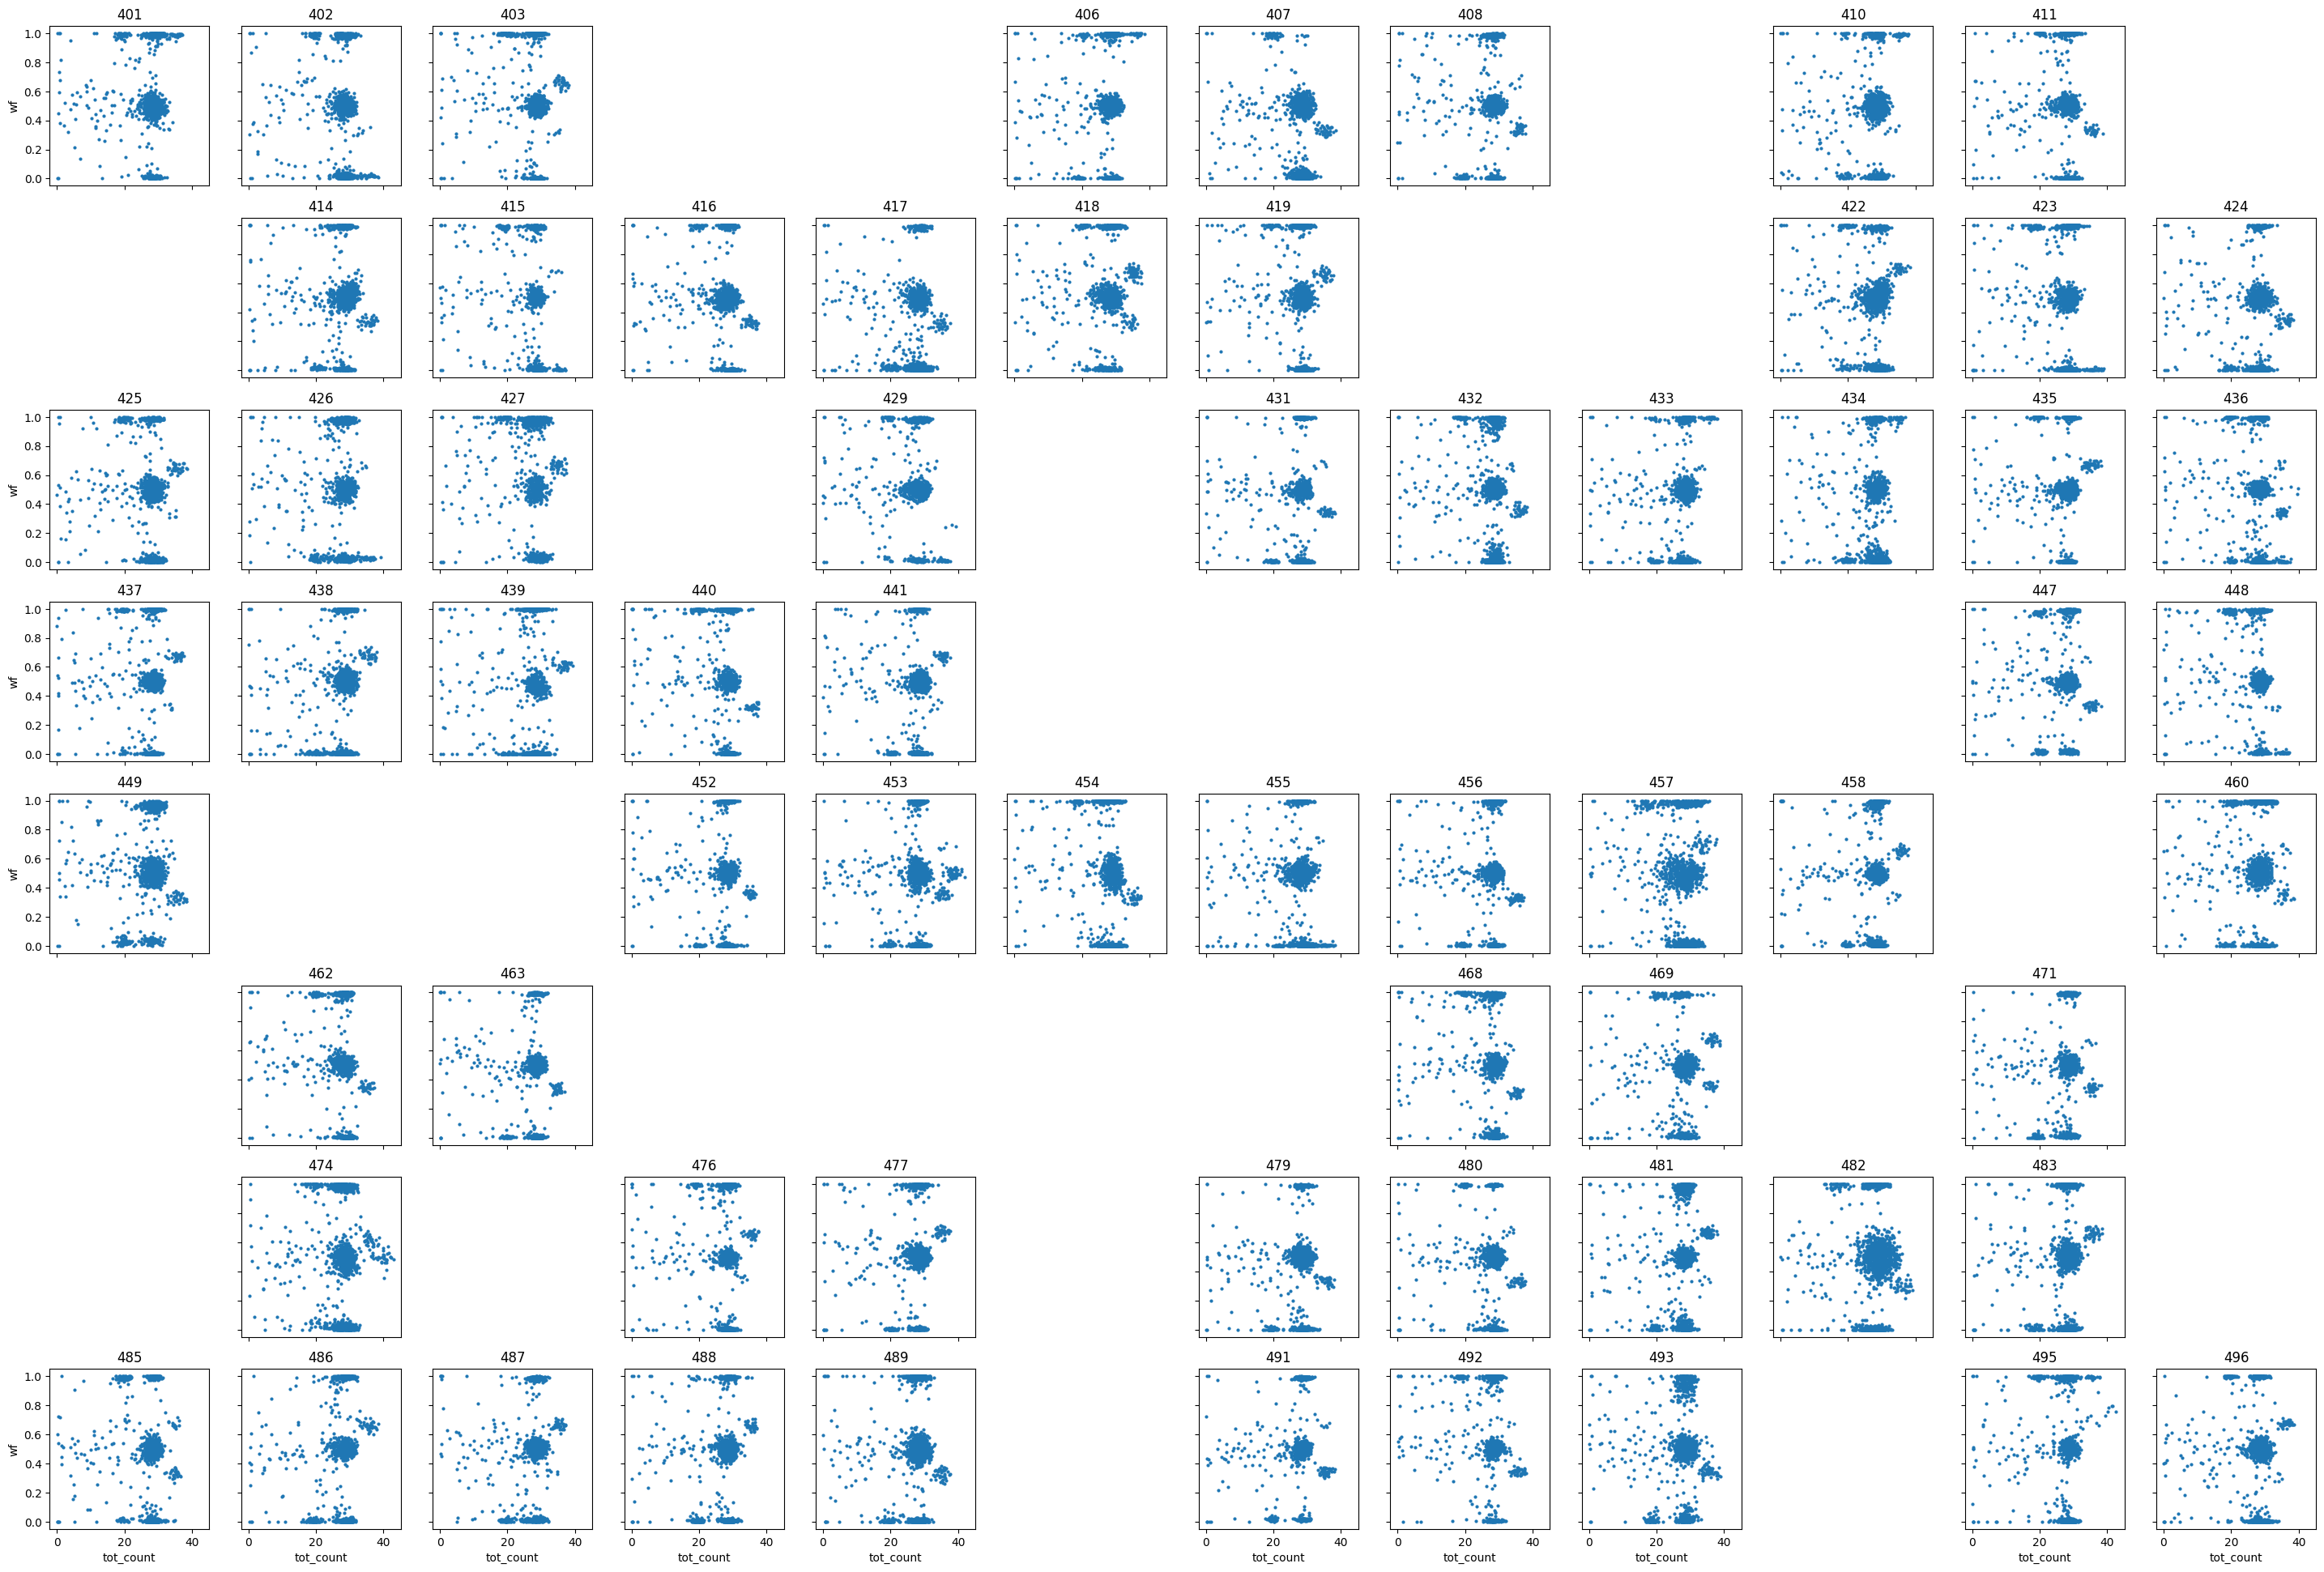

In [6]:
plot_count_ratio_plate(counts, bin_size=2e6)

## clustermap

Before copy number calling, you can have a look at abnormal cells with the `plot_clustermap` function.  
It uses [`seaborn.clustermap`](https://seaborn.pydata.org/generated/seaborn.clustermap.html) under the hood to display read counts as a heatmap and group together chromosomes by similarity.

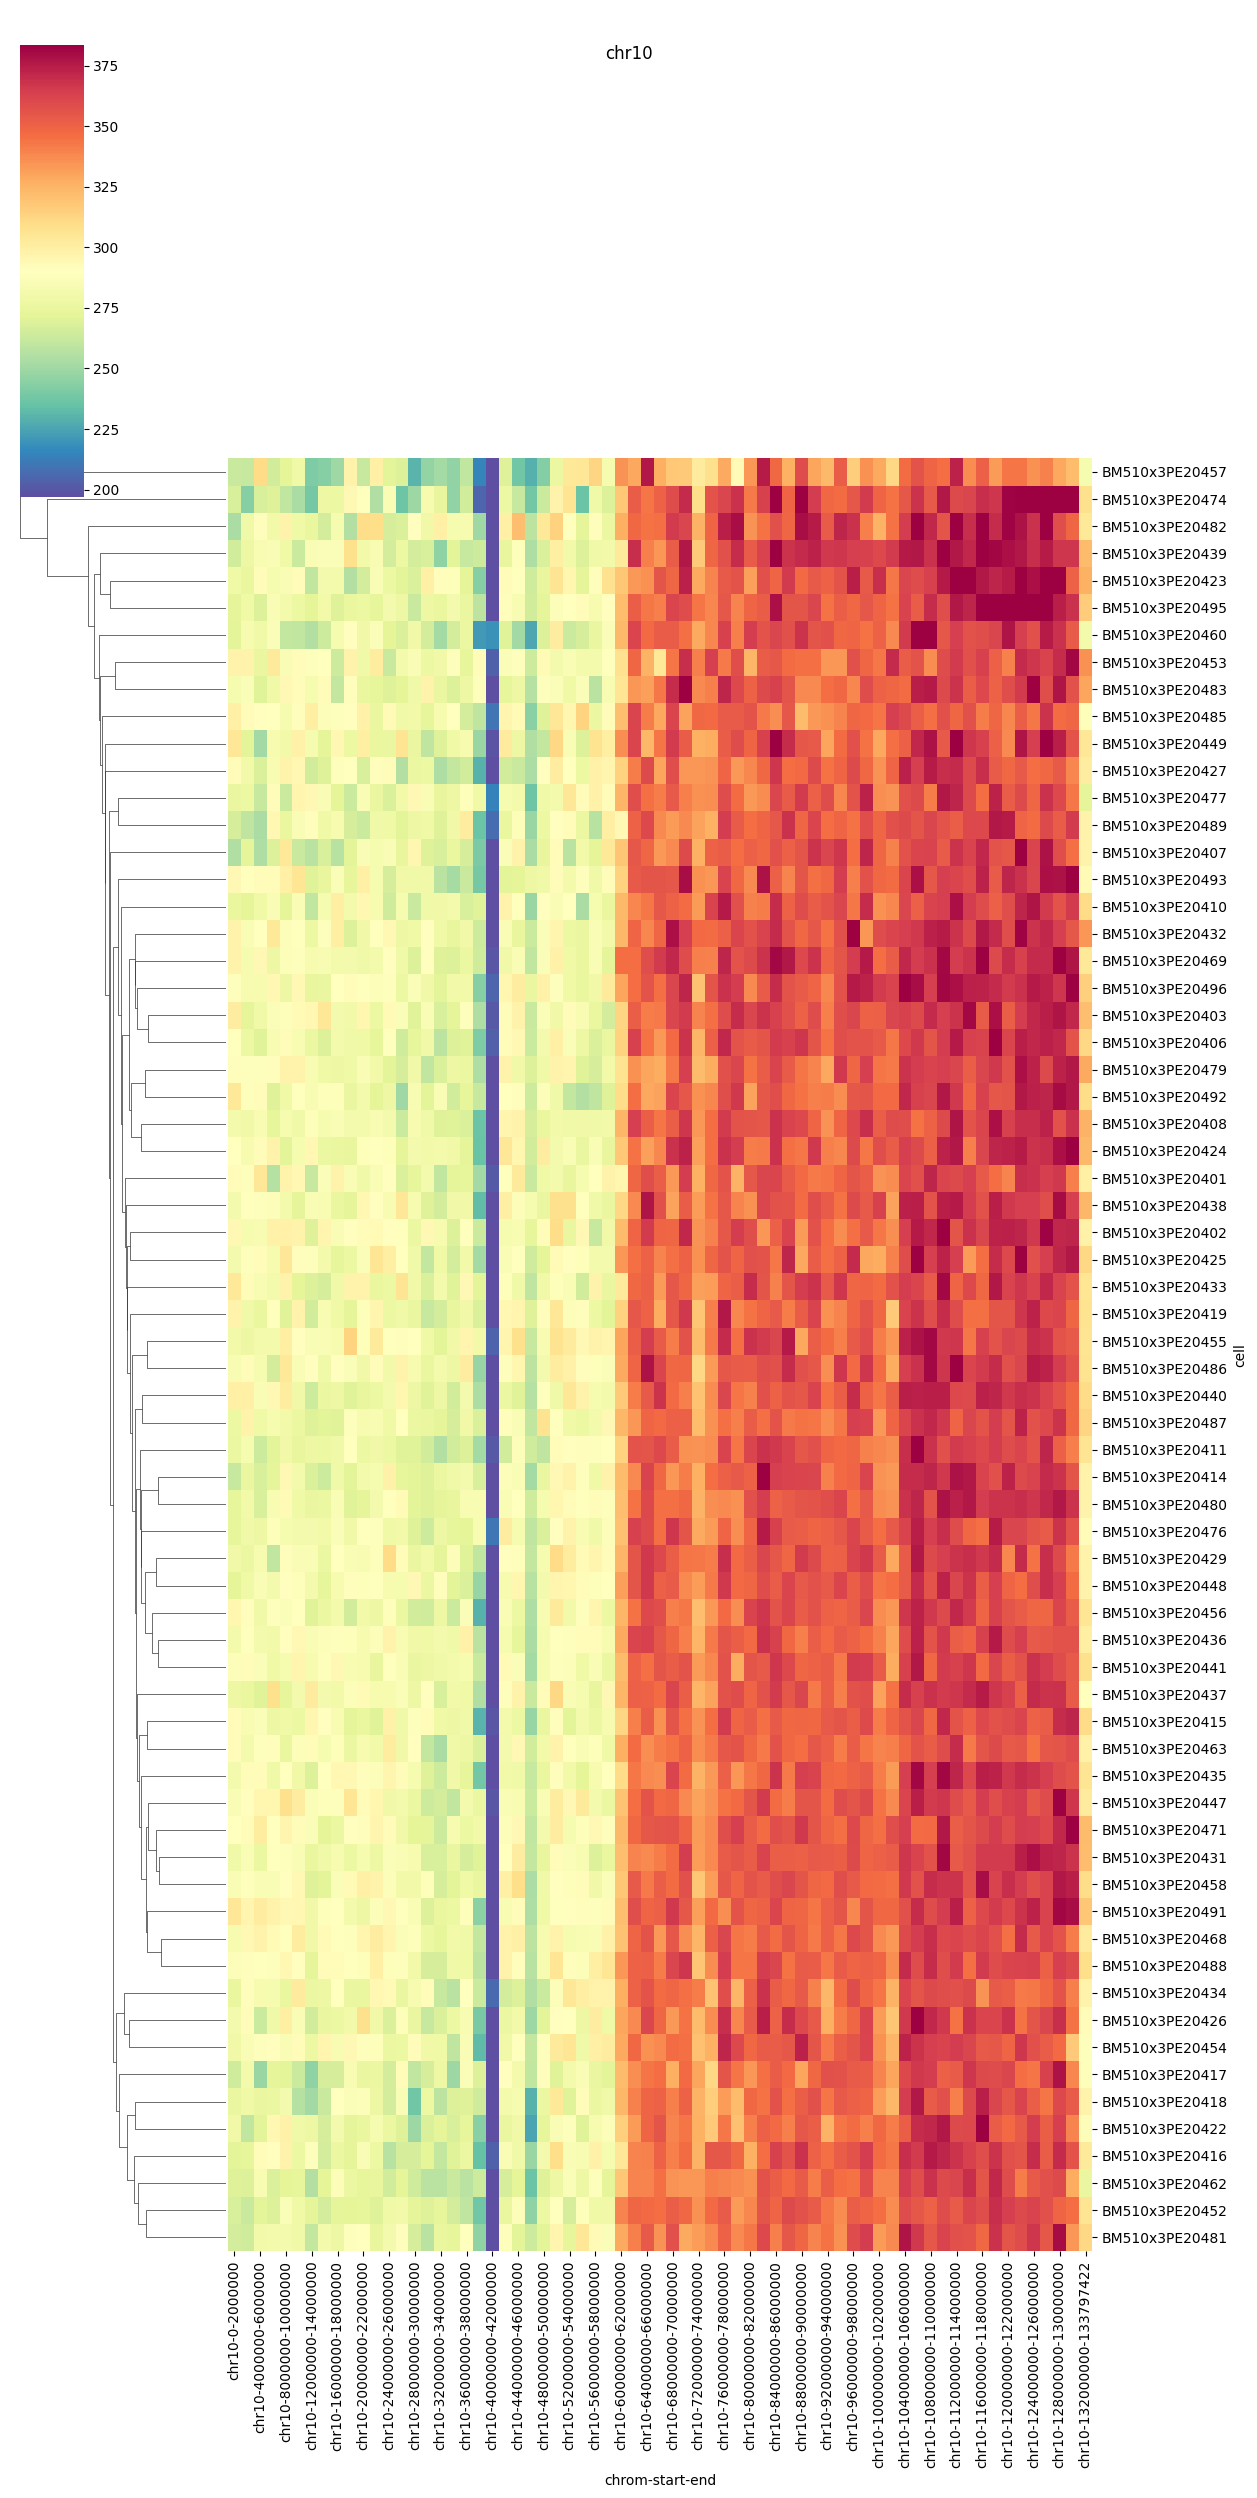

In [7]:
plot_clustermap(counts, chroms=['chr10'], bin_size=2e6, mode='tot_count')

You can then have a look at the cells that have abnormal patterns.

/Users/tweber/miniconda3/envs/strandtools-condaenv/lib/python3.11/site-packages/strandtools/plot.py:333: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


[<Figure size 2500x1000 with 5 Axes>]

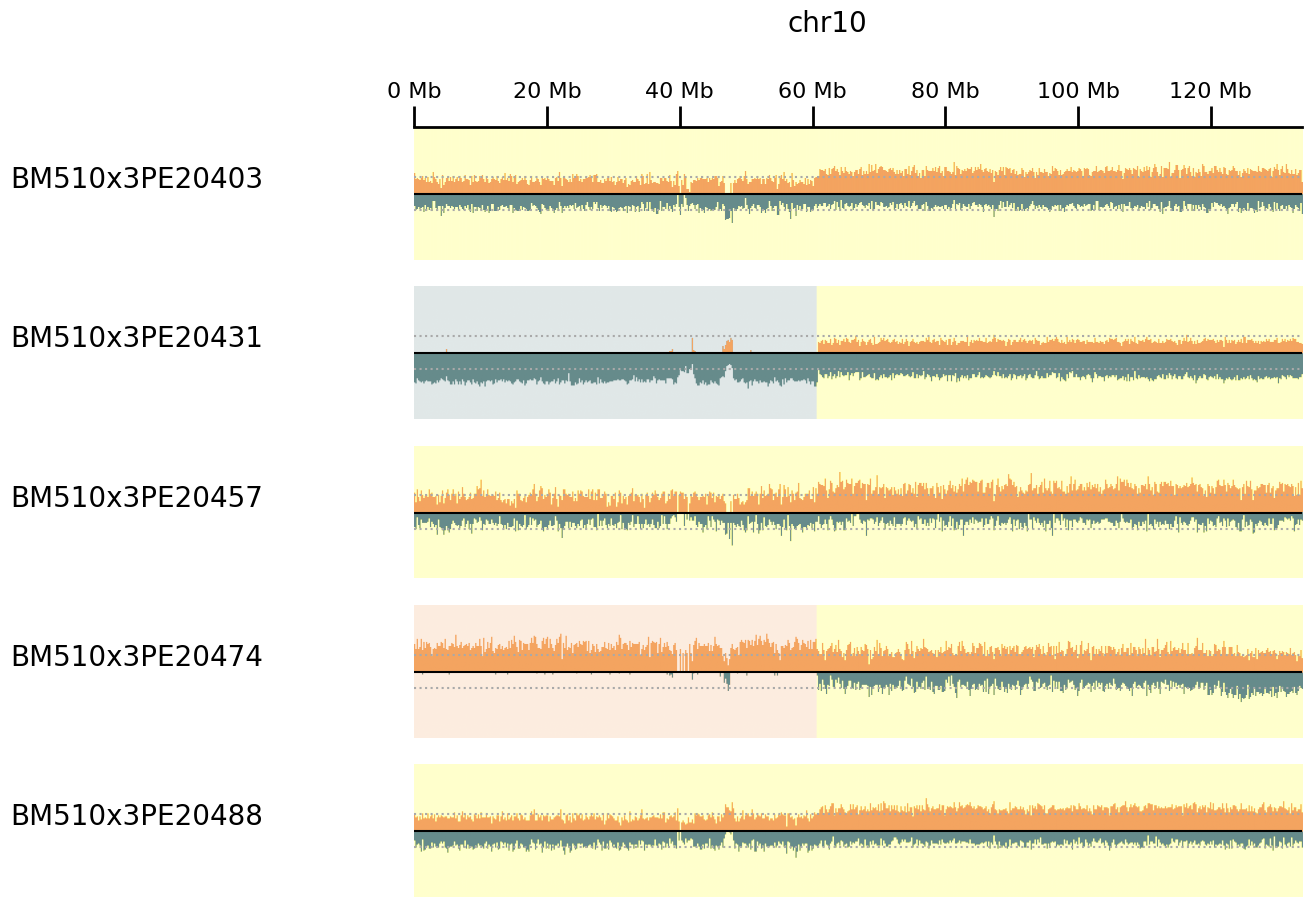

In [8]:
plot(counts[counts['cell'].str.contains('431$|488$|403$|457$|474$')&counts['chrom'].isin(['chr10'])], groupby='chrom', median='cell')

## copy number plots

If a copy number classification is available, there are additional plotting options

In [9]:
import pickle

with open(PATH_TO_CLASSIFIER, 'rb') as f:
    cnc = pickle.load(f)

Firstly, we can get an overview of all copy number calls.

/Users/tweber/miniconda3/envs/strandtools-condaenv/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


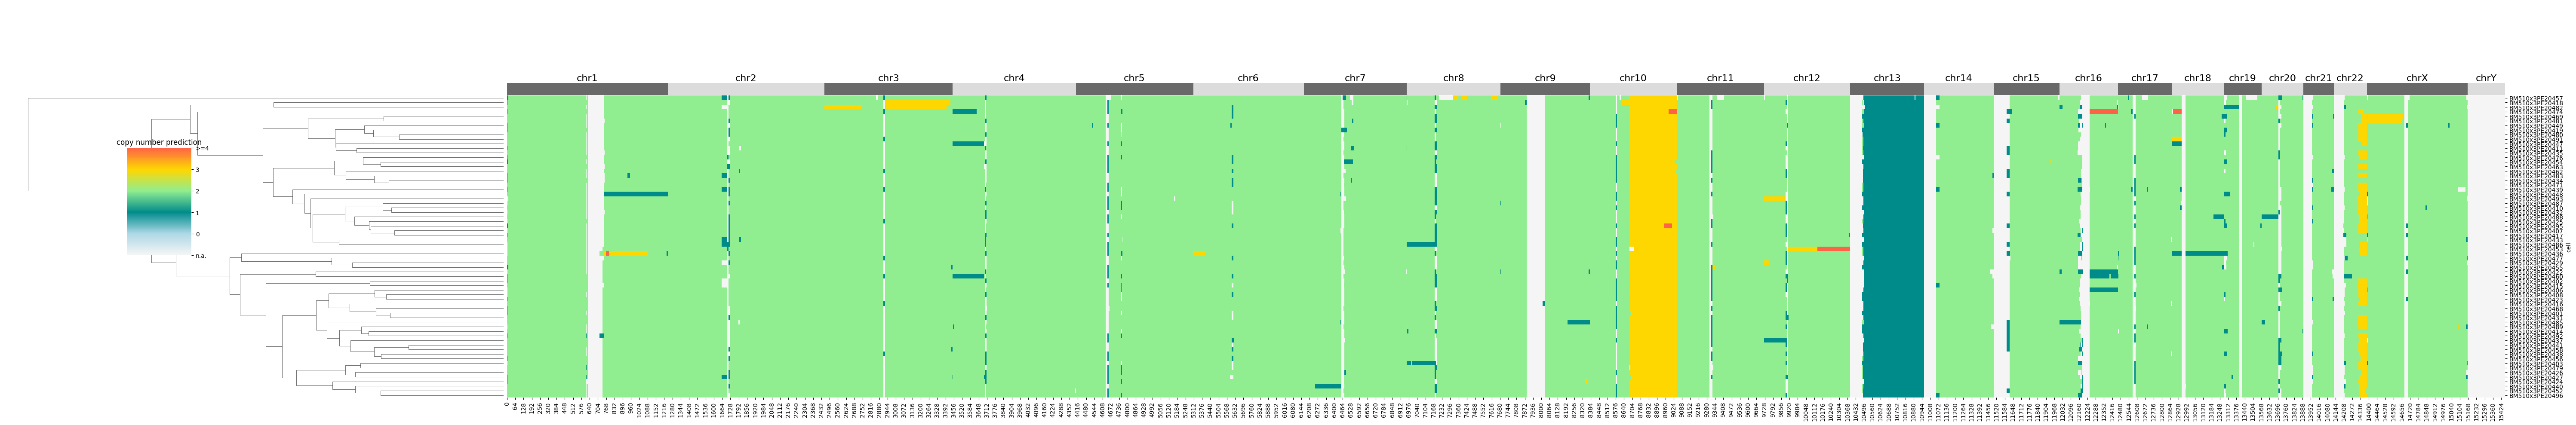

In [10]:
plot_cn_overview(cnc.counts)

But the same overview plotting function can be used to display any other column in the `cnc.counts` object

/Users/tweber/miniconda3/envs/strandtools-condaenv/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


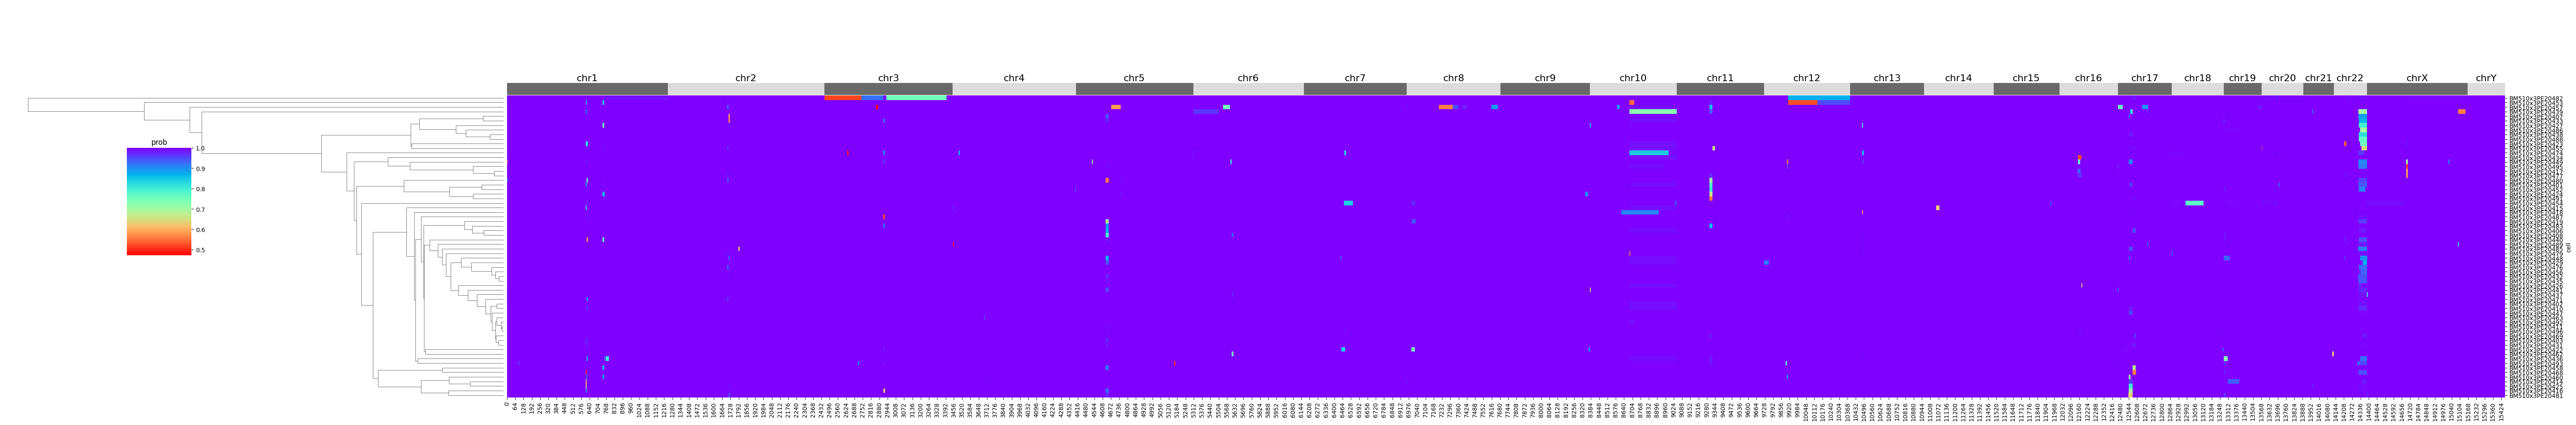

In [11]:
plot_cn_overview(cnc.counts, value='prob', palette='rainbow_r')

Also partial overviews can be displayed, with or without similarity clustering of the cells. Adjust the figure size accordingly.

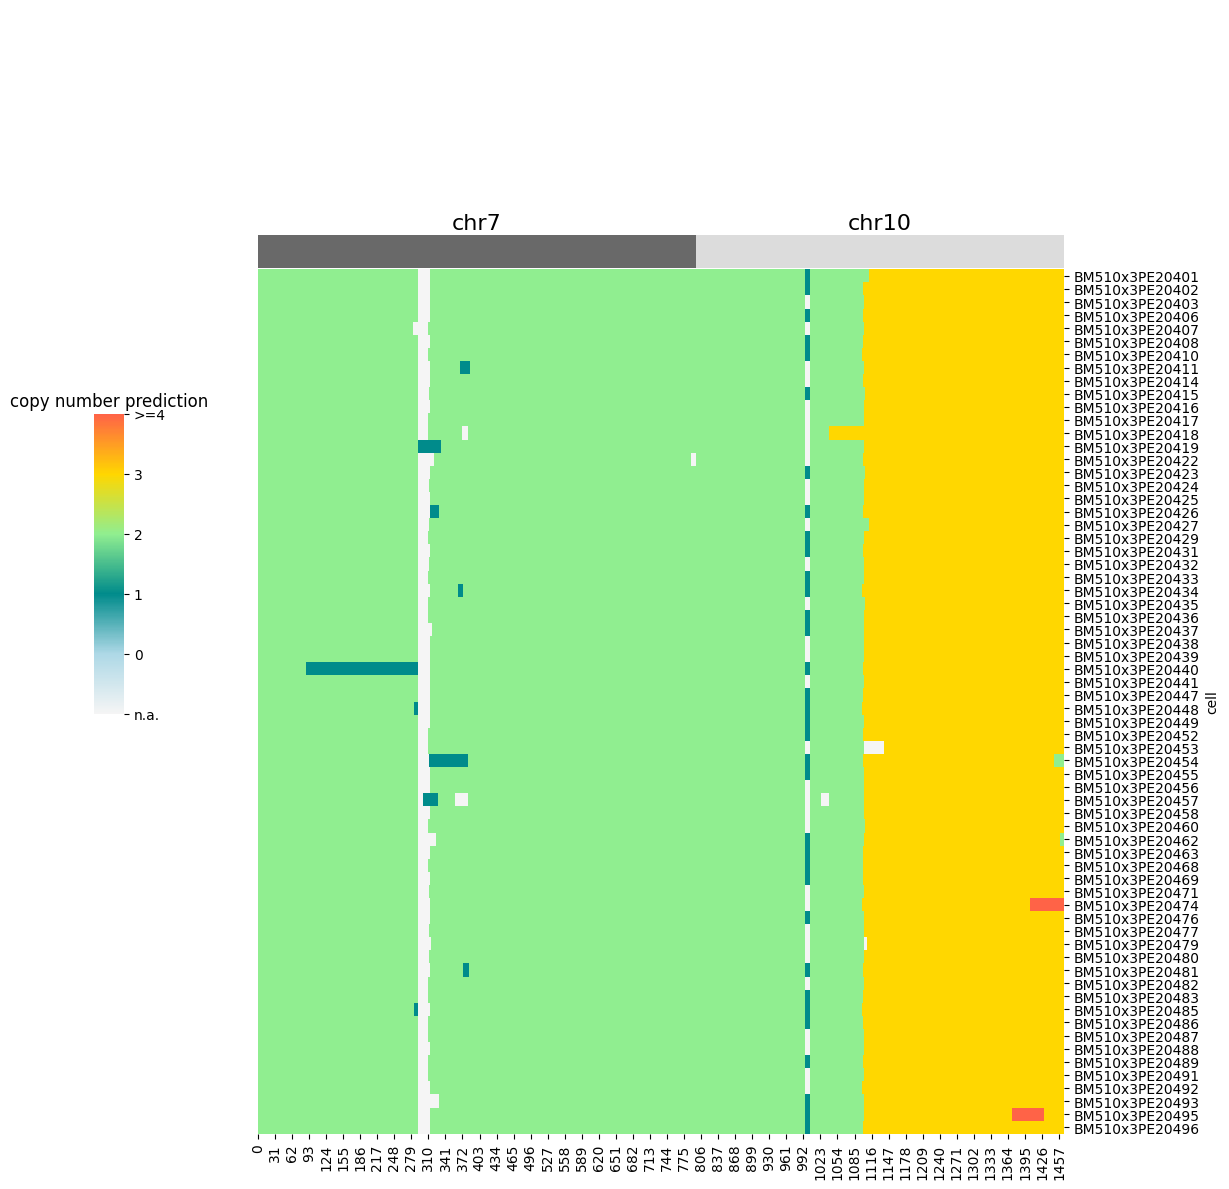

In [12]:
plot_cn_overview(cnc.counts[cnc.counts['chrom'].isin(['chr7', 'chr10'])], figsize=(12,12), row_cluster=False)

With `plot_cn_prediction` we can inspect segmentation and copy number predictions for single chromosomes, to aid in visual copy number alteration and structural variation calling.

[<Figure size 670x600 with 6 Axes>, <Figure size 670x600 with 6 Axes>]

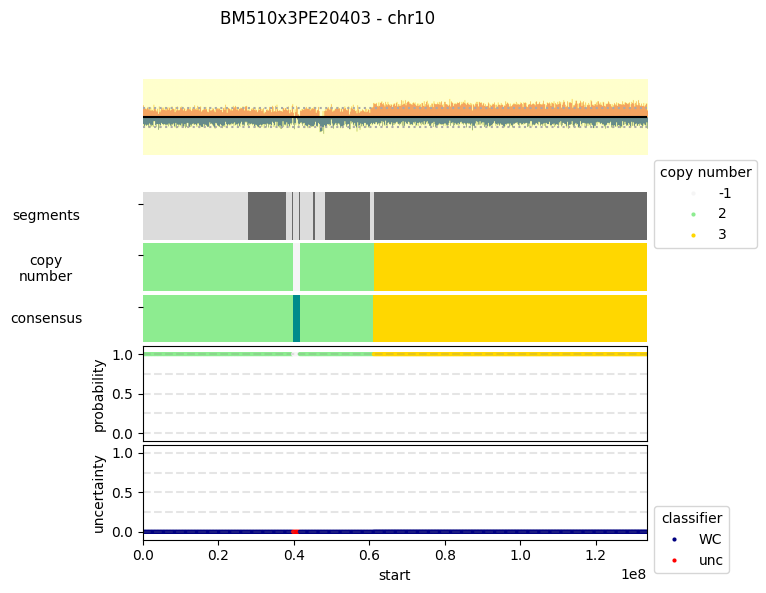

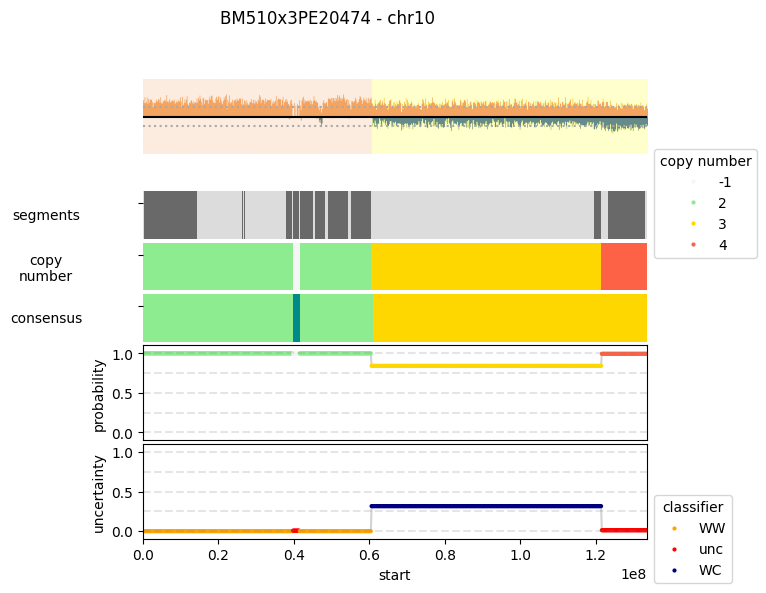

In [13]:
plot_cn_prediction(cnc.counts, cells=['BM510x3PE20403', 'BM510x3PE20474'], chroms=['chr10'])